In [1]:
import striplog

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
facies = {
    'sand'  : striplog.Component({'lithology' : 'S'}),
    'shale' : striplog.Component({'lithology' : 'SH'})
}

sand_decor = striplog.Decor({
    'component': facies['sand'],
    'colour': 'yellow',
    'hatch': '.'
})

shale_decor = striplog.Decor({
    'component': facies['shale'],
    'colour': 'darkgray',
    'hatch': '-'
})

legend = striplog.Legend([sand_decor, shale_decor])

In [3]:
# sand interval -- fixed width
sand1 = striplog.Interval(
        top = 1000.,
        base = 1005.,
        components = [facies['sand']],
        data = {'gs' : 2.0}
)

# shale interval -- fixed width
shale1 = striplog.Interval(
        top = 1005.,
        base = 1010.,
        components = [facies['shale']],
        data = {'gs' : 0.5}
)

# sand interval -- variable width
sand_gs = np.array([
    [1010.5, 2.5],
    [1012., 2.2],
    [1014., 2.7]
])

sand2 = striplog.Interval(
        top = 1010.,
        base = 1015.,
        components = [facies['sand']],
        data = {'gs' : sand_gs}
)

# shale interval -- variable width
shale_gs = np.array([
    [1015., 0.3],
    [1017., 0.5],
    [1018., 0.7]
])

shale2 = striplog.Interval(
        top = 1015.,
        base = 1020.,
        components = [facies['shale']],
        data = {'gs' : shale_gs}
)

In [4]:
slog = striplog.Striplog([sand1, shale1, sand2, shale2])

w: 2.0 --> 1.111111111111111
w: 0.5 --> 0.27777777777777773


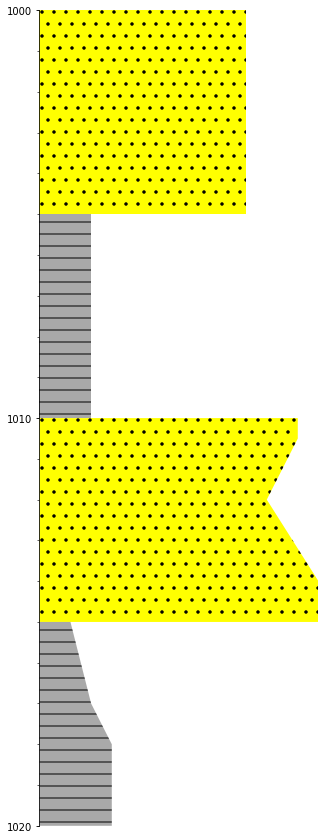

In [5]:
fig, ax = plt.subplots(figsize=(5,15))

ax = slog.plot(field='gs', ax=ax, legend=legend)

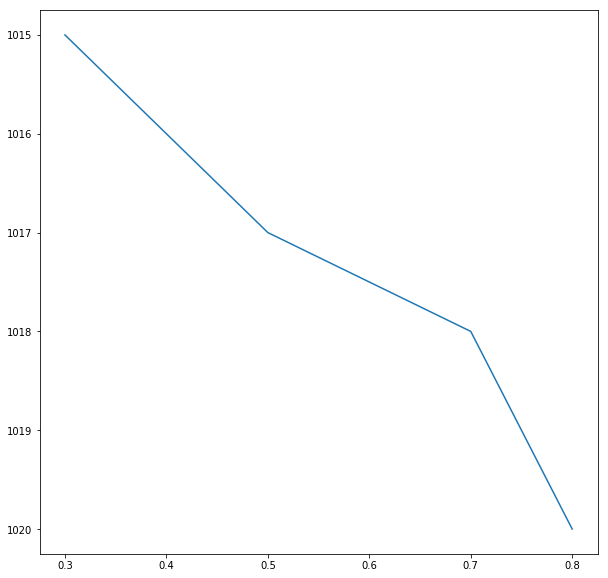

In [59]:
shale_gs = np.array([
    [1015., 0.3],
    [1017., 0.5],
    [1018., 0.7],
    [1020., 0.8]
])

fig, ax = plt.subplots(figsize=(10,10))
ax.invert_yaxis()
ax.plot(shale_gs[:,1], shale_gs[:,0])

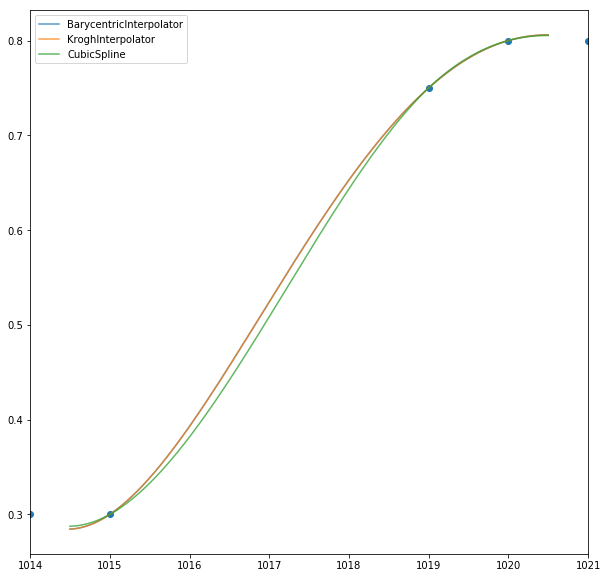

In [91]:
from scipy import interpolate

shale_gs = np.array([
    [1014, 0.3],
    [1015., 0.3],
    #[1017., 0.4],
    [1019., 0.75],
    [1020., 0.8],
    [1021, 0.8]
])

fig, ax = plt.subplots(figsize=(10,10))
#ax.invert_yaxis()

pts_x, pts_y = shale_gs[:,0], shale_gs[:,1]

ix = np.linspace(1014.5, 1020.5, 1000)

for interpolator_name in ['BarycentricInterpolator', 'KroghInterpolator', 'CubicSpline']:
    
    interp = getattr(interpolate, interpolator_name)(pts_x, pts_y)
    
    new_y = interp(ix)
    
    ax.plot(ix, new_y, label=interpolator_name, alpha=0.75)
                          
ax.scatter(pts_x, pts_y)

ax.set_xlim(1014, 1021)

ax.legend()

[2.52853107e-01 1.21223939e+00 1.01813621e+03 5.52601077e-01]


/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(1010, 1025)

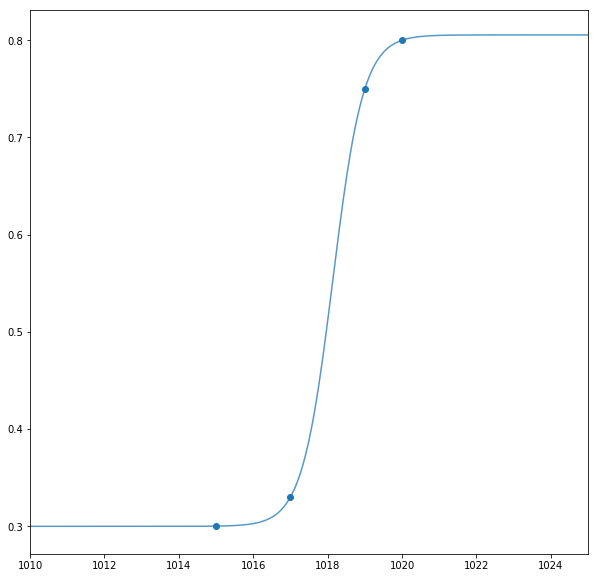

In [101]:
from scipy import interpolate

shale_gs = np.array([
    [1015., 0.3],
    [1017., 0.33],
    [1019., 0.75],
    [1020., 0.8],
])

fig, ax = plt.subplots(figsize=(10,10))
#ax.invert_yaxis()

pts_x, pts_y = shale_gs[:,0], shale_gs[:,1]

ix = np.linspace(1000., 1050., 1000)

def tanh_fn(x, a, b, c, d):
    return a*np.tanh(b*(x-c)) + d
    
popt, cov = curve_fit(tanh_fn, pts_x, pts_y, p0=[0.5, 0.5, 1017.5, 0.5])

print(popt)
    
new_y = tanh_fn(ix, *popt)
    
ax.plot(ix, new_y, alpha=0.75)
                          
ax.scatter(pts_x, pts_y)

ax.set_xlim(1010, 1025)

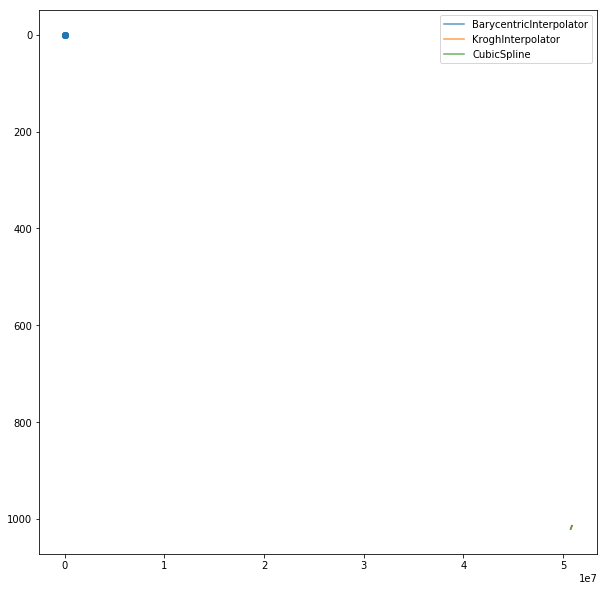

In [71]:
from scipy import interpolate

shale_gs = np.array([
    [1015., 0.3],
    [1017., 0.31],
    [1018., 0.7],
    [1020., 0.8]
])

fig, ax = plt.subplots(figsize=(10,10))
ax.invert_yaxis()

y = np.linspace(1014., 1021., 1000)

for interpolator_name in ['BarycentricInterpolator', 'KroghInterpolator', 'CubicSpline']:
    
    interp = getattr(interpolate, interpolator_name)(shale_gs[:,0], shale_gs[:,1])
    
    new_x = interp(x)
    
    ax.plot(new_x, y, label=interpolator_name, alpha=0.75)
                          
ax.scatter(shale_gs[:,0], shale_gs[:,1])

#ax.set_ylim(1021., 1014.)

ax.legend()